## Exercice 2 

In [74]:
#KMeans for color quantization
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from scipy.spatial import distance

In [75]:
def codebook (source, n_points):
    codebook = shuffle(source, random_state=0)[:n_points]
    return codebook

In [88]:
def assign_samples (codebook, samples):
    cl =[]
    for i in range(samples.shape[0]):
        s_i = np.transpose(samples[i].reshape(samples[i].shape[0],-1)) #to convert 1d array in 2d array
        dist_i = distance.cdist(s_i, codebook, 'euclidean')
        cl_i = np.argmin(dist_i)
        cl.append(cl_i)
    return cl

In [89]:
def calculate_centroids(samples, codebook, cl, n_points):
    centroid = codebook.copy()
  #TO FILL HERE!
    cl = np.asarray(cl) # need to be an array
    for i in range(len(centroid)):
        centroid[i] = np.mean(samples[cl==i], axis=0)
    return centroid

In [90]:
def convergence(samples, codebook_old, codebook_current, thr, cl):
    # FILL HERE!
    # Compute here delta_inertia as the difference between the current inertia (compute on the current codebook) 
    # and the inertia at the previous step (computed on the old codebook)
    delta_inertia=inertia(samples,codebook_old,cl)-inertia(samples,codebook_current,cl)
    print("delta_inertia:",delta_inertia)
    if (delta_inertia > 0 and delta_inertia < thr):
        return True
    else:
        return False
    

In [91]:
def inertia (samples, codebook, cl):
    dist =[]
    for i in range(codebook.shape[0]):
        s_i = np.array([samples[j] for j in np.where(np.array(cl)==i)])
    
        if s_i.size==0:
            continue
        else:
            s_i=np.hstack((s_i))
            s_i = s_i.reshape(s_i.shape[0],-1) #to convert 1d array in 2d array
            c_i = np.transpose(codebook[i].reshape(codebook[i].shape[0],-1))
          
            dist_i_sqr = (distance.cdist(s_i, c_i, 'euclidean'))**2
            dist_i_sqr_sum = np.sum(dist_i_sqr)
            dist.append(dist_i_sqr_sum)
    value_inertia = np.sum(dist)
    return value_inertia

In [110]:
def KMeans (codebook, samples, thr, max_it):
    count = 0
    n_points = len(codebook)
    cls = assign_samples(codebook, samples)
    centroids = calculate_centroids(samples, codebook, cls, n_points) 
    print("Step :",count)
    while (convergence(samples, codebook, centroids, thr, cls)== False and count < max_it):
        cls = assign_samples(centroids, samples)
        codebook = centroids.copy()
        centroids = calculate_centroids(samples, centroids, cls, n_points) 
        count += 1
        print("Step :", count)
    return  cls

In [100]:
def recreate_image(codb, lab, w, h, d):
    img = np.zeros((w,h, d))   
    label_idx = 0
    for i in range(w):
        for j in range(h):
            img[i][j]=codb[lab[label_idx]]
            label_idx = label_idx +1
    return img

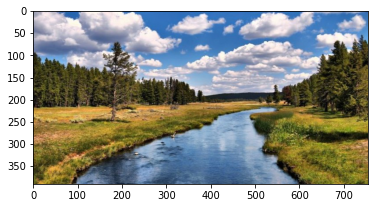

In [101]:
#Reading image
image = plt.imread('landscape.jpg')
image = image.astype(float) / 255
plt.imshow(image)

In [102]:
w, h, d = original_shape = tuple(image.shape)
assert d == 3
image_array = np.reshape(image, (w * h, d))

In [103]:
n_colors = 10
threshold = 0.005
max_iterations = 3

Step : 0
delta_inertia: 35143.25625389404
Step : 1
delta_inertia: 1849.1397166119696
Step : 2
delta_inertia: 2035.848254012366
Step : 3
delta_inertia: 331.7972599158966
Step : 4
delta_inertia: 108.20029617267392


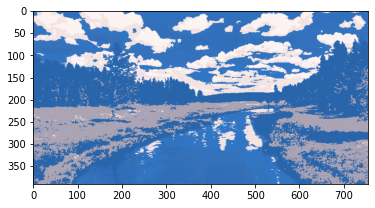

In [104]:
#using 64 points from the first 500 top points 
codebook_random_1 = codebook(image_array[:500], n_colors)

l = KMeans(codebook_random_1, image_array, threshold, max_iterations)

image_1 = recreate_image(codebook_random_1, l, w, h, d)
image_1 = image_1.astype(float)

plt.figure()
plt.imshow(image_1)

In [105]:
#using 64 poitns from the whole image
codebook_random_2 = codebook(image_array, n_colors)

Step : 0
delta_inertia: 5942.062079343055
Step : 1
delta_inertia: 496.03210041805596
Step : 2
delta_inertia: 177.34199631613365
Step : 3
delta_inertia: 53.518692833109526
Step : 4
delta_inertia: 28.151890411115346


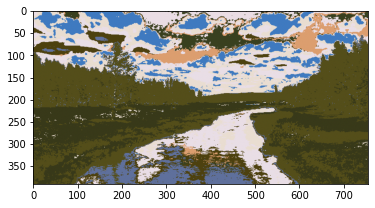

In [106]:
ll = KMeans(codebook_random_2, image_array, threshold, max_iterations)

image_2 = recreate_image(codebook_random_2, l, w, h, d)
image_2 = image_2.astype(float)

plt.figure()
plt.imshow(image_2)

### Question 1 

_What is the size (width and height) of the imagelandscape.jpg ?_

In [112]:
image.shape

(390, 755, 3)

### Question 2 

_What plays the role of m and n?_

m is the number of samples selected in the image. n is the number of color that we want at the end. 

### Question 3

_What does the instruction image_ _ _array = np.reshape(image,(w*h,d)) do ?_

It enables to have only only one array, of size (w*h,3), rather than a matrix with rows and columns of pixels.
In fact, we don't care about the positions of the pixels in this algorithm, so we compact the rows and the colums into one row.

### Question 4

cf code

### Question 5

Step : 0
delta_inertia: 35143.25625389404
Step : 1
delta_inertia: 1849.1397166119696
Step : 2
delta_inertia: 2035.848254012366
Step : 3
delta_inertia: 331.7972599158966
Step : 4
delta_inertia: 108.20029617267392
Step : 5
delta_inertia: 44.54005279375269
Step : 6
delta_inertia: 27.99058193039491
Step : 7
delta_inertia: 45.392631862675444
Step : 8
delta_inertia: 45.71448189788316
Step : 9
delta_inertia: 62.972687808921364
Step : 10
delta_inertia: 185.31725115885638
Step : 11
delta_inertia: 316.07487218192455


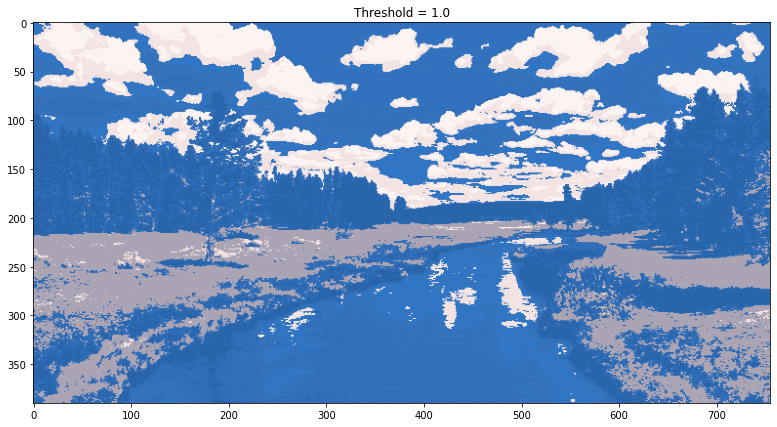

Step : 0
delta_inertia: 35143.25625389404
Step : 1
delta_inertia: 1849.1397166119696
Step : 2
delta_inertia: 2035.848254012366
Step : 3
delta_inertia: 331.7972599158966
Step : 4
delta_inertia: 108.20029617267392
Step : 5
delta_inertia: 44.54005279375269
Step : 6
delta_inertia: 27.99058193039491
Step : 7
delta_inertia: 45.392631862675444
Step : 8
delta_inertia: 45.71448189788316
Step : 9
delta_inertia: 62.972687808921364
Step : 10
delta_inertia: 185.31725115885638
Step : 11
delta_inertia: 316.07487218192455


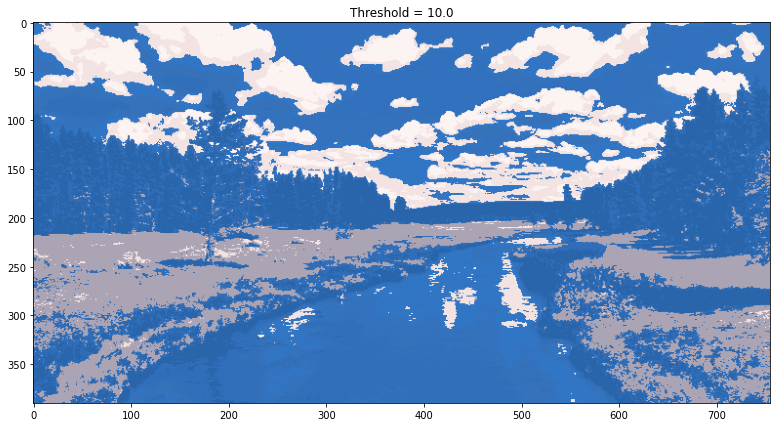

Step : 0
delta_inertia: 35143.25625389404
Step : 1
delta_inertia: 1849.1397166119696
Step : 2
delta_inertia: 2035.848254012366
Step : 3
delta_inertia: 331.7972599158966
Step : 4
delta_inertia: 108.20029617267392
Step : 5
delta_inertia: 44.54005279375269


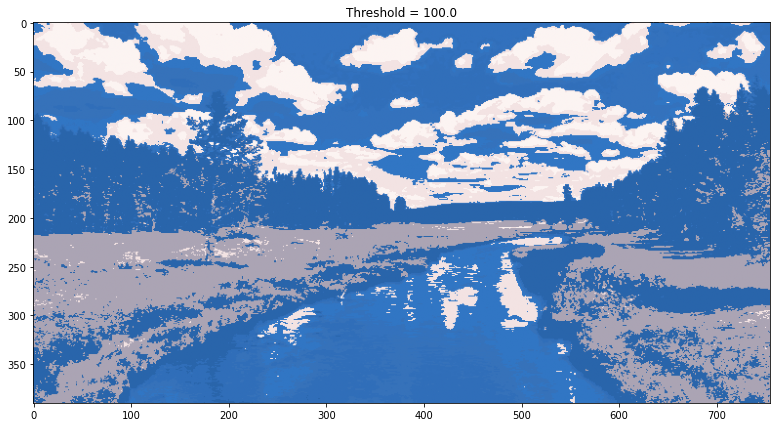

Step : 0
delta_inertia: 35143.25625389404
Step : 1
delta_inertia: 1849.1397166119696
Step : 2
delta_inertia: 2035.848254012366
Step : 3
delta_inertia: 331.7972599158966


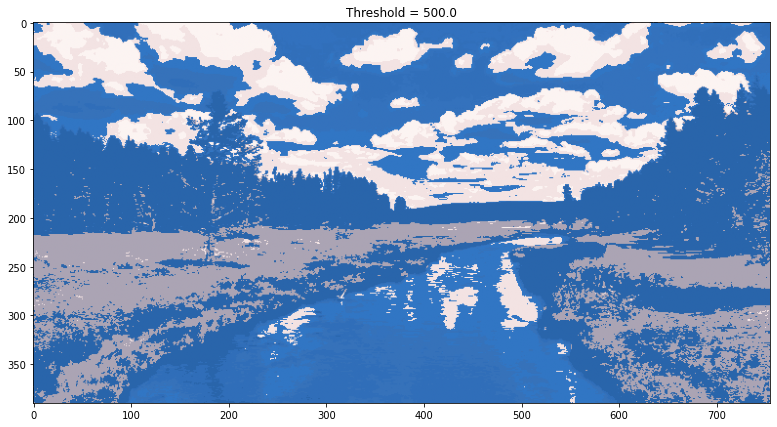

Step : 0
delta_inertia: 35143.25625389404
Step : 1
delta_inertia: 1849.1397166119696


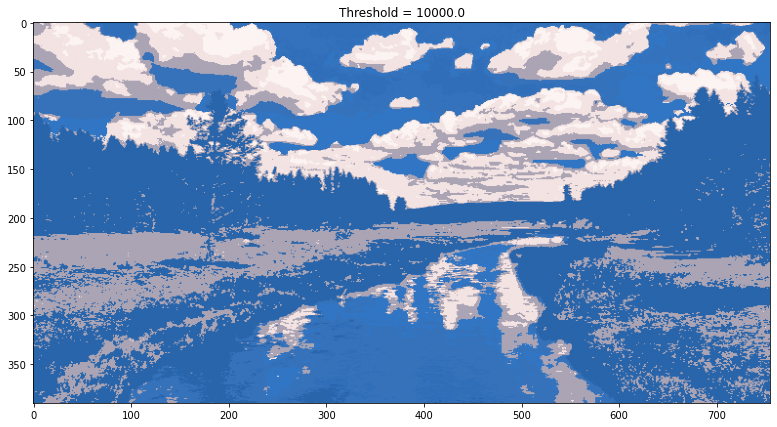

In [108]:
n_colors = 10
thresholds = [1.0,10.0,100.0,500.0,10000.0]
max_iterations = 10

for threshold in thresholds:

    codebook_random_1 = codebook(image_array[:500], n_colors)

    l = KMeans(codebook_random_1, image_array, threshold, max_iterations)

    image_1 = recreate_image(codebook_random_1, l, w, h, d)
    image_1 = image_1.astype(float)

    plt.figure(figsize=(15,7))
    plt.imshow(image_1)
    plt.title("Threshold = "+str(threshold))
    plt.show()


Step : 0
delta_inertia: 35143.25625389404
Step : 1
delta_inertia: 1849.1397166119696


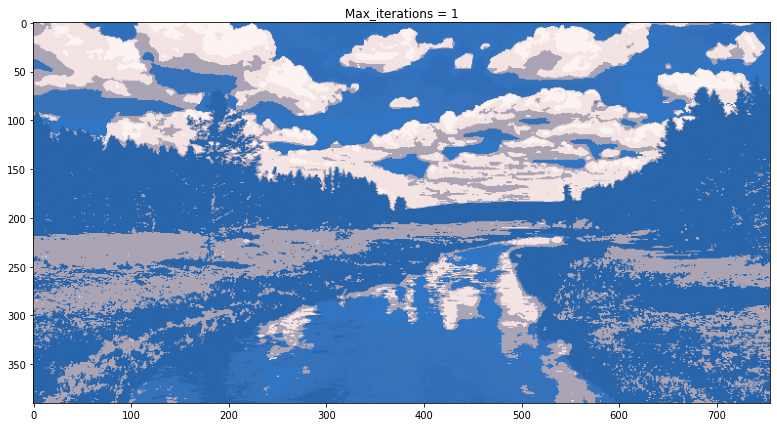

Step : 0
delta_inertia: 35143.25625389404
Step : 1
delta_inertia: 1849.1397166119696
Step : 2
delta_inertia: 2035.848254012366
Step : 3
delta_inertia: 331.7972599158966
Step : 4
delta_inertia: 108.20029617267392
Step : 5
delta_inertia: 44.54005279375269


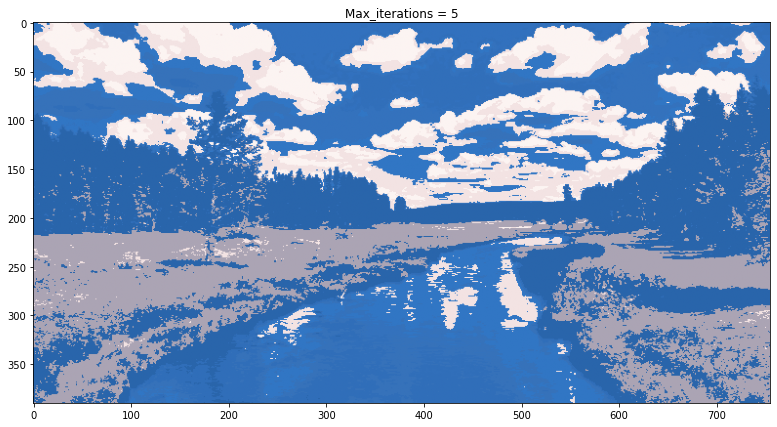

Step : 0
delta_inertia: 35143.25625389404
Step : 1
delta_inertia: 1849.1397166119696
Step : 2
delta_inertia: 2035.848254012366
Step : 3
delta_inertia: 331.7972599158966
Step : 4
delta_inertia: 108.20029617267392
Step : 5
delta_inertia: 44.54005279375269
Step : 6
delta_inertia: 27.99058193039491
Step : 7
delta_inertia: 45.392631862675444
Step : 8
delta_inertia: 45.71448189788316
Step : 9
delta_inertia: 62.972687808921364
Step : 10
delta_inertia: 185.31725115885638
Step : 11
delta_inertia: 316.07487218192455
Step : 12
delta_inertia: 91.18997327138959
Step : 13
delta_inertia: 18.63752897685663
Step : 14
delta_inertia: 7.725075038734758
Step : 15
delta_inertia: 4.6981292305372335


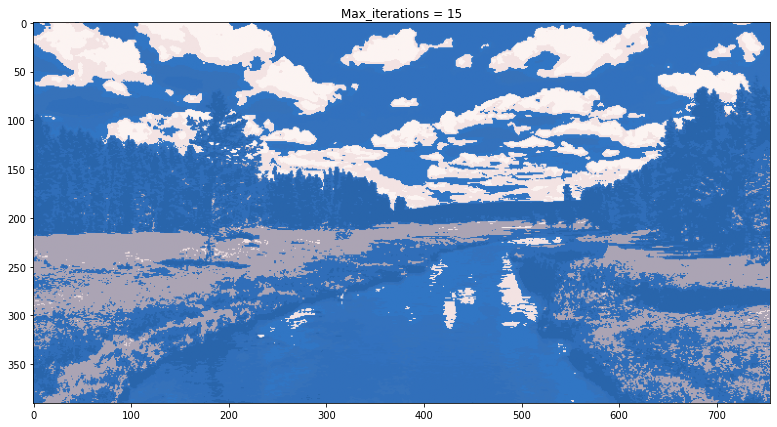

Step : 0
delta_inertia: 35143.25625389404
Step : 1
delta_inertia: 1849.1397166119696
Step : 2
delta_inertia: 2035.848254012366
Step : 3
delta_inertia: 331.7972599158966
Step : 4
delta_inertia: 108.20029617267392
Step : 5
delta_inertia: 44.54005279375269
Step : 6
delta_inertia: 27.99058193039491
Step : 7
delta_inertia: 45.392631862675444
Step : 8
delta_inertia: 45.71448189788316
Step : 9
delta_inertia: 62.972687808921364
Step : 10
delta_inertia: 185.31725115885638
Step : 11
delta_inertia: 316.07487218192455
Step : 12
delta_inertia: 91.18997327138959
Step : 13
delta_inertia: 18.63752897685663
Step : 14
delta_inertia: 7.725075038734758
Step : 15
delta_inertia: 4.6981292305372335
Step : 16
delta_inertia: 3.31906980834583
Step : 17
delta_inertia: 2.508027007781493
Step : 18
delta_inertia: 2.0605826125033673
Step : 19
delta_inertia: 1.8693148799675328
Step : 20
delta_inertia: 2.00713925550599
Step : 21
delta_inertia: 2.0984424066696192
Step : 22
delta_inertia: 2.5018168227002207
Step : 23
de

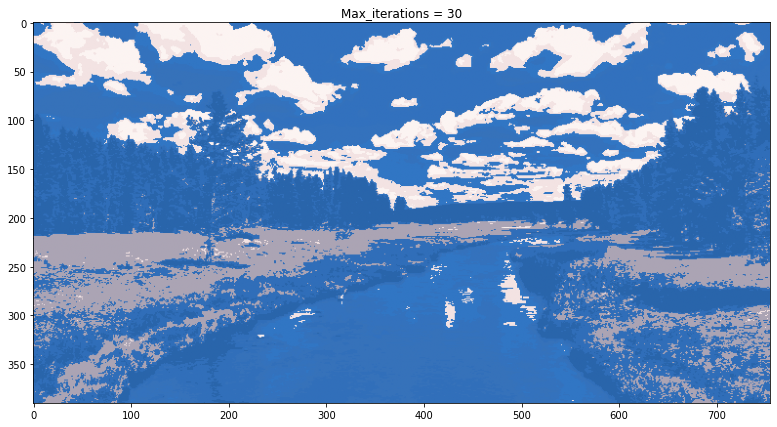

Step : 0
delta_inertia: 35143.25625389404
Step : 1
delta_inertia: 1849.1397166119696
Step : 2
delta_inertia: 2035.848254012366
Step : 3
delta_inertia: 331.7972599158966
Step : 4
delta_inertia: 108.20029617267392
Step : 5
delta_inertia: 44.54005279375269
Step : 6
delta_inertia: 27.99058193039491
Step : 7
delta_inertia: 45.392631862675444
Step : 8
delta_inertia: 45.71448189788316
Step : 9
delta_inertia: 62.972687808921364
Step : 10
delta_inertia: 185.31725115885638
Step : 11
delta_inertia: 316.07487218192455
Step : 12
delta_inertia: 91.18997327138959
Step : 13
delta_inertia: 18.63752897685663
Step : 14
delta_inertia: 7.725075038734758
Step : 15
delta_inertia: 4.6981292305372335
Step : 16
delta_inertia: 3.31906980834583
Step : 17
delta_inertia: 2.508027007781493
Step : 18
delta_inertia: 2.0605826125033673
Step : 19
delta_inertia: 1.8693148799675328
Step : 20
delta_inertia: 2.00713925550599
Step : 21
delta_inertia: 2.0984424066696192
Step : 22
delta_inertia: 2.5018168227002207
Step : 23
de

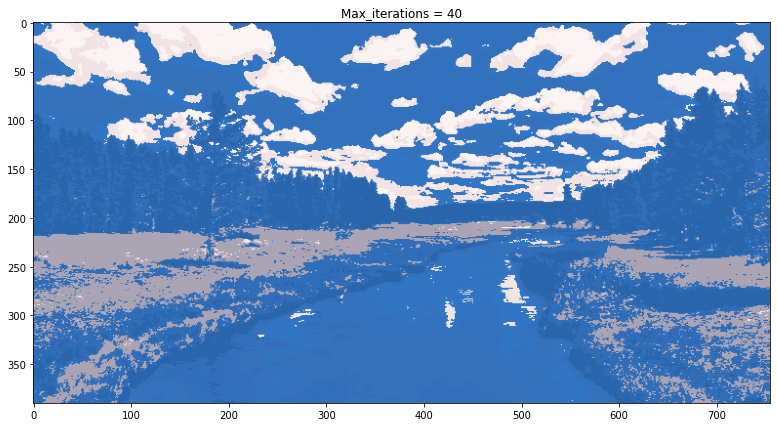

In [111]:
n_colors = 10
threshold = 0.01
max_iterationss = [1,5,15,30,40]

for  max_iterations in max_iterationss:

    codebook_random_1 = codebook(image_array[:500], n_colors)

    l = KMeans(codebook_random_1, image_array, threshold, max_iterations)

    image_1 = recreate_image(codebook_random_1, l, w, h, d)
    image_1 = image_1.astype(float)

    plt.figure(figsize=(15,7))
    plt.imshow(image_1)
    plt.title("Max_iterations = "+str(max_iterations))
    plt.show()